In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns
sns.set(rc={'image.cmap': 'jet'})
%matplotlib inline
plt.rc('font', family='serif')

import sys
sys.path
sys.path.append('../python/')
from gen_data import *
from predict import ctw
from causality import binary_causality

# Temporary to avoid the "if self._edgecolors == str('face')" FutureWarning
import warnings
warnings.filterwarnings('ignore')

save_figs = False
fig_dir = './'

In [46]:
N = 3
K = 2
T = 1000

params = np.zeros((N,N,K))
# X params
params[0,0,0] = 0   # x_{t-2} -> x_t
params[0,0,1] = -0.40546   # x_{t-1} -> x_t # P(X=1|X=1) = 0.6
params[0,1,0] = 0   # y_{t-2} -> x_t
params[0,1,1] = -1.0986   # y_{t-1} -> x_t # P(X=1|Y=1) = 0.75
params[0,2,0] = 0   # z_{t-2} -> x_t
params[0,2,1] = 0.20067   # z_{t-1} -> x_t # P(X=1|Z=1) = 0.45
# Y params
params[1,0,0] = 0   # x_{t-2} -> y_t
params[1,0,1] = 0   # x_{t-1} -> y_t
params[1,1,0] = 0   # y_{t-2} -> y_t
params[1,1,1] = 0   # y_{t-1} -> y_t
params[1,2,0] = 0   # z_{t-2} -> y_t
params[1,2,1] = 0   # z_{t-1} -> y_t
# Z params
params[2,0,0] = 0   # x_{t-2} -> z_t
params[2,0,1] = 0   # x_{t-1} -> z_t
params[2,1,0] = 0   # y_{t-2} -> z_t
params[2,1,1] = 0   # y_{t-1} -> z_t
params[2,2,0] = 0   # z_{t-2} -> z_t
params[2,2,1] = 0   # z_{t-1} -> z_t

biases = np.zeros(N)
biases[0] = 0
biases[1] = 1.386294 # P(Y=1) = 0.2
biases[2] = 0

(sequences,probs) = gen_bernoulli(N,T,K,params=params,biases=biases)

(950, 1000)

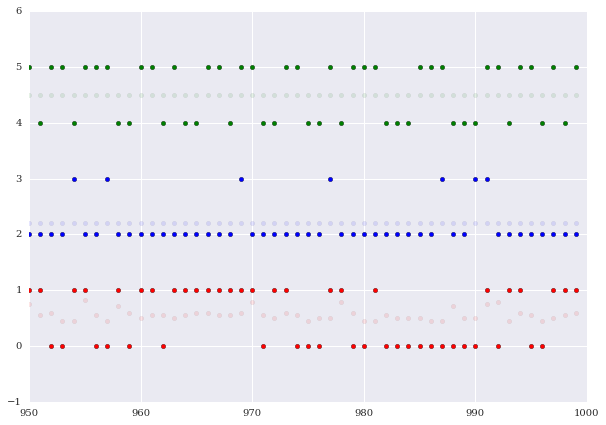

In [47]:
plt.figure(figsize=(10,7))
c = ['r','b','g']
for n in range(N):
    sequence = sequences[n,:]
    prob = probs[n,:]
    plt.scatter(range(T),sequence+n*2,c=c[n])
    plt.scatter(range(T),prob+n*2,c=c[n],alpha=0.1)
    
plt.xlim([T-50,T])

In [48]:
c_probs, c_pes, c_tree = ctw(sequences,depth=1)
r_probs, r_pes, r_tree = ctw(sequences[[0],:],depth=1)

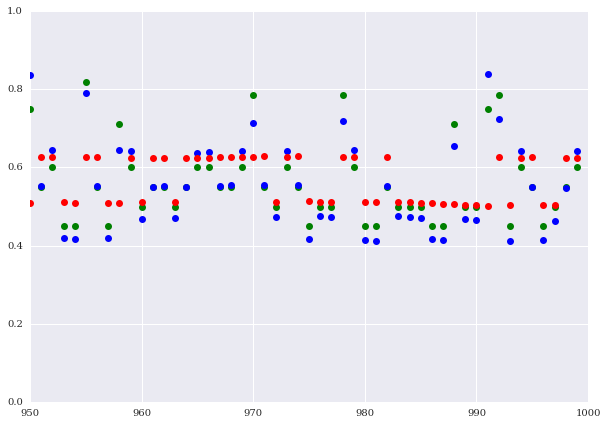

In [49]:
plt.figure(figsize=(10,7))
plt.plot(probs[0,:],'go')
plt.plot(c_probs,'bo')
plt.plot(r_probs,'ro')
plt.ylim([0,1])
plt.xlim([T-50,T]);

(920, 1000)

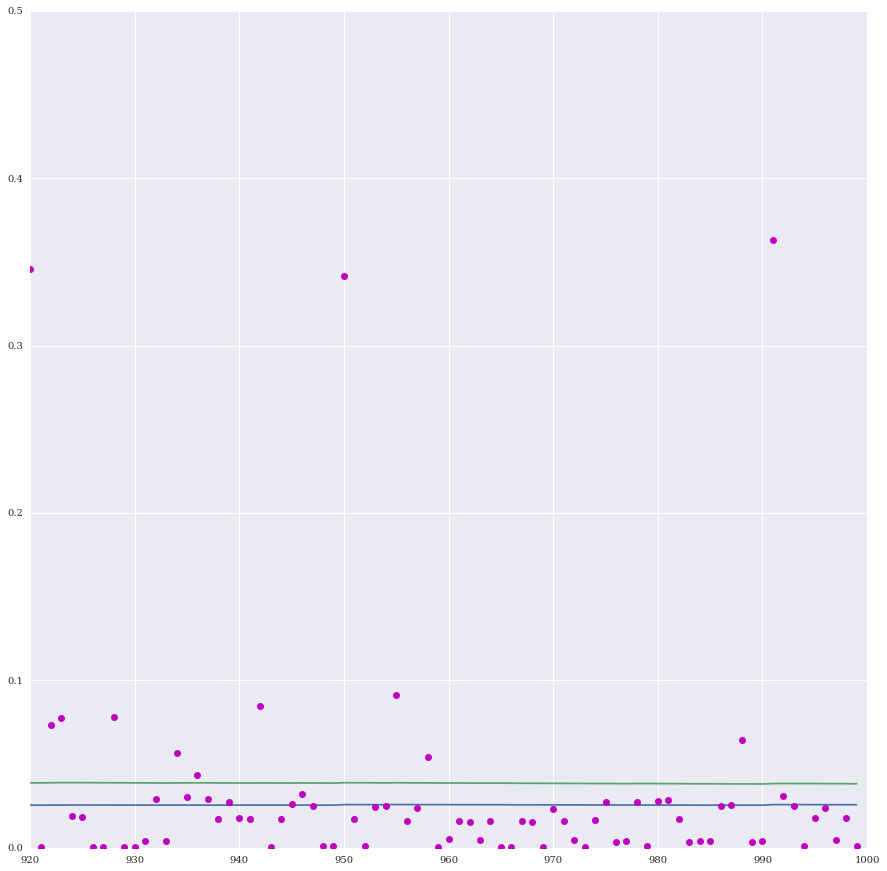

In [51]:
cyx = binary_causality(c_probs,r_probs)
true_cyx = binary_causality(probs[0,:],[0.58]*T)

plt.figure(figsize=(15,15))
c = ['r','b','g']
'''for n in range(N):
    sequence = sequences[n,:]
    prob = probs[n,:]
    plt.scatter(range(T),sequence+0.3+n*0.1,c=c[n])
    #plt.scatter(range(T),prob+n*0.1,c=c[n],alpha=0.1)
'''
plt.plot(np.cumsum(cyx)/np.arange(len(cyx)))
#plt.plot([0,T],[0.088,0.088],'k--')
plt.plot(cyx,'mo')
#plt.plot(true_cyx,'yo')
plt.plot(np.cumsum(np.abs(np.asarray(cyx)-np.asarray(true_cyx)))/np.arange(len(cyx)))


plt.xlim([T-80,T])



In [ ]:
plt.figure(figsize(10,10))